## **Import libraries**

In [1]:
import pandas as pd # handle tabular data (like Excel)
import seaborn as sns # make pretty plots easily
import matplotlib.pyplot as plt # customize and shows plots

## **Create a small dataset with some noise**

In [3]:
# Small dataset: Height (cm) and Weight (Kg)
data = {
    'Height': [150, 160, 170, 180, 190],
    'Weight': [51, 56, 58, 66, 69] # Added some noise (not perfect)
}

df = pd.DataFrame(data)
df

,Height,Weight
0,150,51
1,160,56
2,170,58
3,180,66
4,190,69


## **Plot the data**

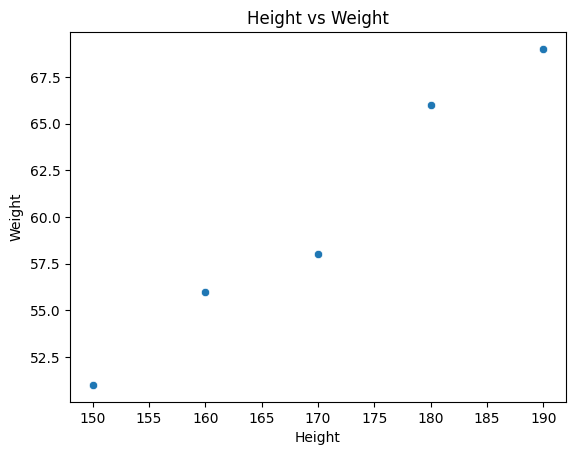

In [4]:
sns.scatterplot(data=df, x='Height', y='Weight')
plt.title("Height vs Weight")
plt.show()

## **Fit a regression line with Seaborn**

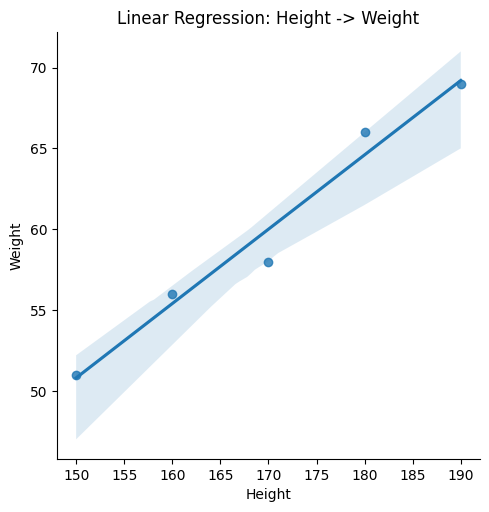

In [6]:
sns.lmplot(data=df, x='Height', y='Weight')
plt.title("Linear Regression: Height -> Weight")
plt.show()

# Dots (actual data)
# A blue line (the regression line)
# A shaded area (condifence interval around the line)

## **Get the slope and intercept**

In [8]:
import numpy as np

# Calculate mean
x_mean = df['Height'].mean()
y_mean = df['Weight'].mean()

# Calculate b (slope)
numerator = ((df['Height'] - x_mean) * (df['Weight'] - y_mean)).sum()
denominator = ((df['Height'] - x_mean) ** 2).sum()
b = numerator / denominator

# Calculate a (intercept)
a = y_mean - b * x_mean

print(f"Slope (b): {b:.2f}")
print(f"Intercept (a): {a:.2f}")

Slope (b): 0.46
Intercept (a): -18.20


## **Calculate residuals and standard error**

In [9]:
# Predicted Y
df['Predicted'] = a + b * df['Height']

# Residuals (error)
df['Residual'] = df['Weight'] - df['Predicted']

# Standard error
residual_squared = df['Residual'] ** 2
se = np.sqrt(residual_squared.sum() / (len(df) - 2))

print(f"Standard Error: {se:.2f}")
df

Standard Error: 1.46


,Height,Weight,Predicted,Residual
0,150,51,50.8,0.2
1,160,56,55.4,0.6
2,170,58,60.0,-2.0
3,180,66,64.6,1.4
4,190,69,69.2,-0.2
